In [4]:
import pandas as pd
import numpy as np

In [21]:
from sklearn.datasets import fetch_california_housing

In [22]:
import matplotlib.pyplot as plt

In [29]:
 df=fetch_california_housing()

In [30]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
dataset=pd.DataFrame(df.data)

In [34]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [35]:
dataset.columns=df.feature_names

In [36]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [37]:
## Independent and Dependent features
X=dataset
y=df.target

In [38]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [39]:
#train-test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=4)

In [40]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7379,2.1473,41.0,3.416185,1.000000,1644.0,4.751445,33.97,-118.24
16825,3.5250,34.0,4.296296,0.895062,398.0,2.456790,37.63,-122.49
4424,1.5491,20.0,1.640000,0.680000,87.0,3.480000,34.06,-118.25
17693,5.7078,17.0,5.395735,1.014218,1887.0,4.471564,37.28,-121.81
19584,5.6945,36.0,6.191489,1.021277,124.0,2.638298,37.59,-120.59
...,...,...,...,...,...,...,...,...
16840,5.0479,22.0,5.135878,1.054962,3783.0,2.887786,37.63,-122.46
11863,3.5962,36.0,6.095420,1.148855,632.0,2.412214,40.31,-121.24
17093,2.7969,38.0,4.067010,1.028351,879.0,2.265464,37.48,-122.23
8366,2.6734,26.0,4.238938,1.188053,2340.0,2.588496,33.97,-118.35


In [41]:
##standardisatiom
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [42]:
X_train=scaler.fit_transform(X_train)

In [43]:
X_test=scaler.transform(X_test)

In [44]:

from sklearn.linear_model import LinearRegression 
##Cross validation
from sklearn.model_selection import cross_val_score

In [51]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [47]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [48]:
np.mean(mse)

-0.5328095408152926

In [52]:
##prediction 
reg_predict=regression.predict(X_test)

In [53]:
reg_predict

array([2.05882934, 2.50156213, 1.61033727, ..., 2.27724788, 0.92397711,
       2.73830676])

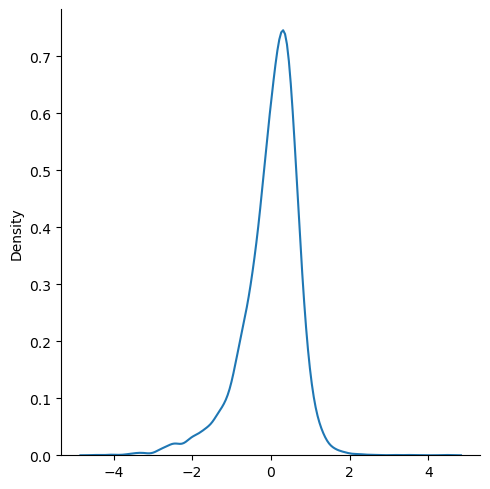

In [55]:
import seaborn as sns
sns.displot(reg_predict-y_test,kind='kde')

In [56]:
from sklearn.metrics import r2_score

In [58]:
score=r2_score(reg_predict,y_test)

In [59]:
score

0.33245327445169814